<img src="https://www.rochester.edu/assets/images/ur-logo.svg">

# <center>[CSC 249/449: Machine Vision](https://www.cs.rochester.edu/~cxu22/t/249F20/)</center>

## Homework Submission
After completed the homework notebook. 
- Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your NetID below.
- `Kernel`$\rightarrow$ `Restart & Run All` (in the menubar).
- You can generated zip file using following command:
    ```python
    NetID=''
    make_submission(NetID)
    ```
- Double-check **generated zip file**, text, math, code, outputs, figures. Re-run if needed.
- Sumbit the zip file via blackboard.
- 1% deduction of late assignment total score per hour passing the deadline.
---------


##  Part 1. Understand filters
---

### Problem 1.1

Implement the Gaussian kernel in pixel domain, which is defined as:

$$k(x,y)=\frac{1}{2\pi\sigma^2} \cdot e^\frac{x^2+~y^2}{-2\sigma^2}$$


In [4]:
from cs249 import *

In [5]:
import numpy as np 
def gaussian_kernel(shape=(5,5),sigma=5):
    """
    Arguments:
    ----------
        shape : tuple
            size of the filter.
            A 3D numpy.ndarray of shape (h,w).
        sigma : real number
            shapeness of the filter.
    Returns:
    --------
        Gaussian filter with specified shape.
    """
    # YOUR CODE HERE
    x,y=shape
    matrix=np.zeros(shape)
    for row in range(x):
        for col in range(y):
            matrix[row][col] = (1/(np.pi*2*sigma**2))*np.exp(((row-(x-1)/2)**2+(col-(y-1)/2)**2)/(-2*sigma**2))
    return matrix/np.sum(matrix)

In [6]:
gaussian_kernel(shape=(5, 5),sigma=5)

array([[0.03688345, 0.03916419, 0.03995536, 0.03916419, 0.03688345],
       [0.03916419, 0.04158597, 0.04242606, 0.04158597, 0.03916419],
       [0.03995536, 0.04242606, 0.04328312, 0.04242606, 0.03995536],
       [0.03916419, 0.04158597, 0.04242606, 0.04158597, 0.03916419],
       [0.03688345, 0.03916419, 0.03995536, 0.03916419, 0.03688345]])

If correctly implemented, you should see

```python
array([[0.03688345, 0.03916419, 0.03995536, 0.03916419, 0.03688345],
       [0.03916419, 0.04158597, 0.04242606, 0.04158597, 0.03916419],
       [0.03995536, 0.04242606, 0.04328312, 0.04242606, 0.03995536],
       [0.03916419, 0.04158597, 0.04242606, 0.04158597, 0.03916419],
       [0.03688345, 0.03916419, 0.03995536, 0.03916419, 0.03688345]])
```

### Problem 1.2

#### a. Use `plot_3D` to plot 3d shape of the kernel.
Parameter:
- kernel: generated by the `gaussian_kernel` function with `shape=(15,15), sigma=5`
- X: the x-axis linespace with `kernel.shape[1]` samples, keep 0 at the center. e.g. `[-1,0,1]` for `3x3` kernel
- Y: the y-axis linespace with `kernel.shape[0]` samples, keep 0 at the center. e.g. `[-1,0,1]` for `3x3` kernel


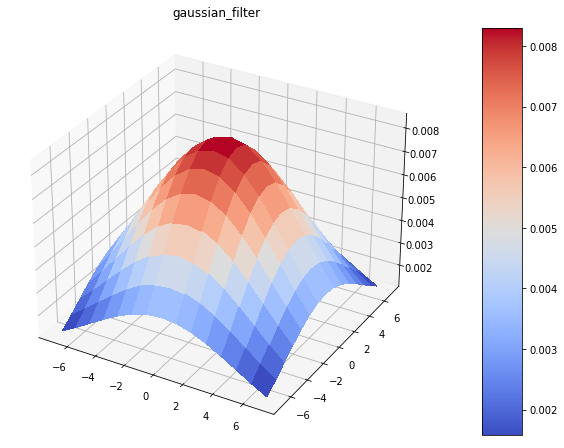

In [7]:
# YOUR CODE HERE
import matplotlib.pylab as plt
X=np.linspace(-7,7,15,endpoint=True)
Y=np.linspace(-7,7,15,endpoint=True)
kernel=gaussian_kernel(shape=(15, 15),sigma=5)
plot_3D(kernel,X,Y, 'gaussian_filter')

#### b. Plot gaussian with with different parameters and describle the relation between sigma and the kernel shape.  

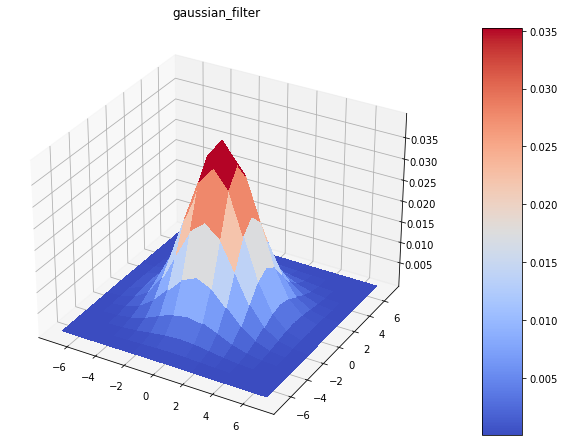

In [8]:
kernel = gaussian_kernel(shape=(15, 15),sigma=2)
plot_3D(kernel,X,Y, 'gaussian_filter')

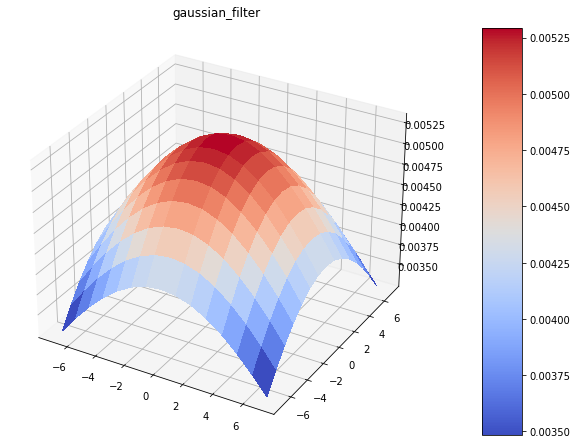

In [9]:
kernel = gaussian_kernel(shape=(15, 15),sigma=10)
plot_3D(kernel,X,Y, 'gaussian_filter')

Summary: If sigma increases, the surface (kernel shape) will become smoother

### Problem 1.3

Compare different noise and smoothing method

#### a. generate two image with `gaussian` and `pepper-and-salt` repectively.
- use `np.random.normal()` to generate gaussian noise
- use ` np.clip()` to limit the pixel value 

In [10]:
image = cv2.imread(str(data/'lena.tiff'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0

In [11]:
import os
import cv2
import random
def gassian_noise(img,mean,sigma):
    # YOUR CODE HERE
    img = img + np.random.normal(mean, sigma, img.shape)
    # restrict out of range cases 
    img_clipped = np.clip(img, 0, 1)
    return img

In [12]:
def salt_pepper_noise(img,amount,ratio):
    # ratio: # of salt/# all noises
    # amount: noise amount, 0.01 = 1% of total pixels will become noise
    # YOUR CODE HERE
    sum_salt = img.size * amount * ratio 
    sum_pepper = img.size * amount * (1-ratio)
    coords = [np.random.randint(0, i - 1, round(sum_salt)) for i in img.shape]
    img[coords[0],coords[1]]=1
    coords = [np.random.randint(0, i - 1, round(sum_pepper)) for i in img.shape]
    img[coords[0],coords[1]]=0
    return img

In [13]:
coords = [np.random.randint(0, i - 1, round(10)) for i in image.shape]
coords
image.shape

(512, 512)

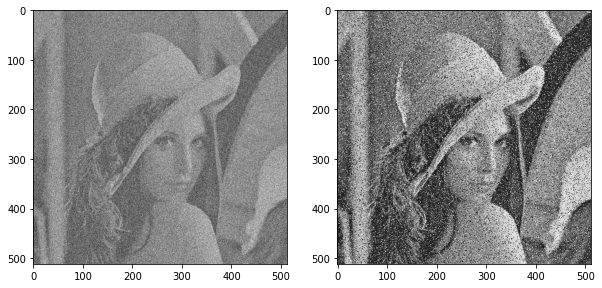

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,20))
gassian_noise_img=gassian_noise(image,0,0.25)
salt_pepper_noise_img=salt_pepper_noise(image,0.2,0.5)
axs[0].imshow(gassian_noise_img,cmap='gray')
axs[1].imshow(salt_pepper_noise_img,cmap='gray')

#### b. implement `median` filter and apply `gaussian` filter and `median` filter to both generated image.

In [15]:
def median_filter(img,size=3):
    # return the filtered image
    # YOUR CODE HERE
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            m1 = img[i-1][j-1]
            m2 = img[i-1][j]
            m3 = img[i-1][j+1]
            m4 = img[i][j-1]
            m5 = img[i][j]
            m6 = img[i][j+1]
            m7 = img[i+1][j-1]
            m8 = img[i+1][j]
            m9 = img[i+1][j+1]
            img[i][j] = np.median([m1,m2,m3,m4,m5,m6,m7,m8,m9])           
    return img

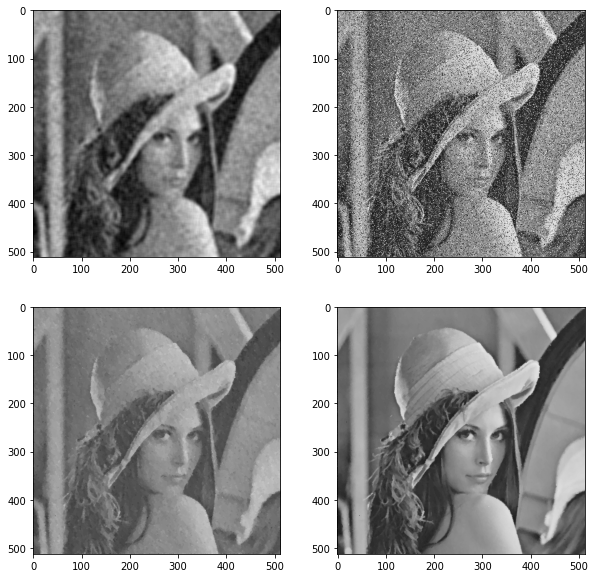

In [16]:
gassian_noise_img=gassian_noise(image,0,0.1)
salt_pepper_noise_img=salt_pepper_noise(image,0.01,0.7)
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].imshow(cv2.filter2D(gassian_noise_img,-1,gaussian_kernel((10,10),5)),cmap='gray')
axs[0,1].imshow(cv2.filter2D(salt_pepper_noise_img,-1,gaussian_kernel((3,3),0.25)),cmap='gray')
axs[1,0].imshow(median_filter(gassian_noise_img),cmap='gray')
axs[1,1].imshow(median_filter(salt_pepper_noise_img),cmap='gray')

# NetID: yfan24
Student: Yangxin Fan